# 11.시계열

## 11.1 날짜, 시간 자료형, 도구

In [1]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2020, 3, 11, 19, 59, 47, 963959)

In [2]:
now.year, now.month, now.day

(2020, 3, 11)

마이크로초까지 지원

In [3]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

In [7]:
from datetime import timedelta

start = datetime(2011,1,7)

start+timedelta(12) #timedelta는 (일,초,마이크로초)로 표현함

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 11.1.1 문자열을 datetime으로 변환하기

In [9]:
stamp = datetime(2011,1,7)

str(stamp)

'2011-01-07 00:00:00'

In [11]:
stamp.strftime('%Y-%m-%d') # 날짜 -> 문자열

'2011-01-07'

In [12]:
value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d') # 문자열 -> 날짜

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

거의 대부분의 사람이 인지하는 날짜 표현 방식을 파싱 가능

In [14]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

날짜가 맨 앞으로 올 경우 바꿀 수 있음

In [16]:
parse('6/11/2011', dayfirst=True)

datetime.datetime(2011, 11, 6, 0, 0)

to_datetime은 많은 종류의 날짜 표현을 처리

In [18]:
import pandas as pd

datestrs = ['2011-07-06 12:00:00','2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [19]:
idx = pd.to_datetime(datestrs+[None])

idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
idx[2]

NaT

In [21]:
pd.isnull(idx)

array([False, False,  True])

## 11.2 시계열 기초

In [22]:
from datetime import datetime
import numpy as np

dates = [datetime(2011,1,2),datetime(2011,1,5),
        datetime(2011,1,7),datetime(2011,1,8),
        datetime(2011,1,10),datetime(2011,1,12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.314366
2011-01-05   -1.148098
2011-01-07    0.535085
2011-01-08   -0.476854
2011-01-10    0.188788
2011-01-12   -0.840646
dtype: float64

ts 변수 타입은 TimeSeries

In [23]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [24]:
ts + ts[::2]

2011-01-02    2.628732
2011-01-05         NaN
2011-01-07    1.070170
2011-01-08         NaN
2011-01-10    0.377577
2011-01-12         NaN
dtype: float64

In [27]:
ts.index.dtype

dtype('<M8[ns]')

In [29]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### 11.2.1 색인, 선택, 부분 선택

In [31]:
stamp = ts.index[2]

ts[stamp]

0.5350848473562128

In [35]:
ts['1/10/2011']

0.18878843442922494

In [36]:
ts['20110110']

0.18878843442922494

In [38]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01    1.859763
2000-01-02    0.181581
2000-01-03    0.604716
2000-01-04   -0.729272
2000-01-05   -0.654663
                ...   
2002-09-22   -0.608272
2002-09-23   -0.152414
2002-09-24   -0.384507
2002-09-25    1.081313
2002-09-26    0.008520
Freq: D, Length: 1000, dtype: float64

In [39]:
longer_ts['2001']

2001-01-01    0.923022
2001-01-02    1.091771
2001-01-03    0.798047
2001-01-04   -1.851098
2001-01-05   -0.893961
                ...   
2001-12-27    0.101308
2001-12-28    0.102358
2001-12-29    0.954730
2001-12-30   -0.772727
2001-12-31    0.280875
Freq: D, Length: 365, dtype: float64

In [40]:
longer_ts['2001-05']

2001-05-01    0.408677
2001-05-02    1.658841
2001-05-03    1.664599
2001-05-04    0.023235
2001-05-05   -0.474072
2001-05-06   -0.553613
2001-05-07    1.547173
2001-05-08   -1.078938
2001-05-09   -1.067135
2001-05-10   -0.053368
2001-05-11    0.543683
2001-05-12    0.383823
2001-05-13    0.160361
2001-05-14    0.700054
2001-05-15   -0.570741
2001-05-16    0.875798
2001-05-17   -0.151038
2001-05-18    1.678610
2001-05-19    0.216090
2001-05-20    0.416433
2001-05-21    1.323959
2001-05-22   -0.122135
2001-05-23   -0.372220
2001-05-24   -1.095104
2001-05-25    1.050527
2001-05-26   -0.662682
2001-05-27    1.128357
2001-05-28   -0.370096
2001-05-29   -2.950219
2001-05-30   -0.441214
2001-05-31    0.498682
Freq: D, dtype: float64

In [42]:
ts[datetime(2011,1,7):]

2011-01-07    0.535085
2011-01-08   -0.476854
2011-01-10    0.188788
2011-01-12   -0.840646
dtype: float64

In [43]:
ts

2011-01-02    1.314366
2011-01-05   -1.148098
2011-01-07    0.535085
2011-01-08   -0.476854
2011-01-10    0.188788
2011-01-12   -0.840646
dtype: float64

In [44]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.535085
2011-01-08   -0.476854
2011-01-10    0.188788
dtype: float64

In [45]:
ts.truncate(after='1/9/2011')

2011-01-02    1.314366
2011-01-05   -1.148098
2011-01-07    0.535085
2011-01-08   -0.476854
dtype: float64

위에 전부 데이터프레임에도 적용됨

### 11.2.2 중복된 색인을 갖는 시계열

In [47]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])

dup_ts = pd.Series(np.arange(5), index = dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [48]:
dup_ts.index.is_unique

False

In [49]:
dup_ts['1/3/2000'] #중복 없음

4

In [50]:
dup_ts['1/2/2000'] #중복 있음

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [52]:
grouped = dup_ts.groupby(level=0) #단일 단계 인덱싱
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [53]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 날짜 범위, 빈도, 이동

In [54]:
ts

2011-01-02    1.314366
2011-01-05   -1.148098
2011-01-07    0.535085
2011-01-08   -0.476854
2011-01-10    0.188788
2011-01-12   -0.840646
dtype: float64

### 11.3.1 날짜 범위 생성하기

In [55]:
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [56]:
pd.date_range(start = '2012-04-01', periods = 20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [57]:
pd.date_range(end = '2012-06-01', periods = 20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range('2000-01-01','2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

- BM : 월 영업마감일
- M : 월 마지막 일
- S : 월 시작일
- BMS : 월 영업시작일
- W-MON, W-TUE ... : 요일별

In [60]:
pd.date_range('2012-05-02 12:56:31', periods = 5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

자정에 맞춰 정규화하고 싶을 경우

In [61]:
pd.date_range('2012-05-02 12:56:31', periods = 5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 11.3.2 빈도와 날짜 오프셋

In [62]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [63]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [64]:
pd.date_range('2000-01-01','2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [65]:
Hour(2) + Minute(30)

<150 * Minutes>

In [66]:
pd.date_range('2000-01-01', periods = 10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [67]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

매월 3째주 금요일

### 11.3.3 데이터 시프트

시프트는 데이터를 시간 축에서 앞이나 뒤로 이동하는 것을 의미

In [68]:
ts = pd.Series(np.random.randn(4), index = pd.date_range('1/1/2000',periods=4, freq='M'))
ts

2000-01-31    0.633537
2000-02-29    0.372421
2000-03-31   -1.043329
2000-04-30    0.483507
Freq: M, dtype: float64

M은 월 마지막 일

In [69]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.633537
2000-04-30    0.372421
Freq: M, dtype: float64

In [71]:
ts.shift(-2)

2000-01-31   -1.043329
2000-02-29    0.483507
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [72]:
ts.shift(2, freq='M')

2000-03-31    0.633537
2000-04-30    0.372421
2000-05-31   -1.043329
2000-06-30    0.483507
Freq: M, dtype: float64

In [73]:
ts.shift(3, freq='D')

2000-02-03    0.633537
2000-03-03    0.372421
2000-04-03   -1.043329
2000-05-03    0.483507
dtype: float64

In [74]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.633537
2000-02-29 01:30:00    0.372421
2000-03-31 01:30:00   -1.043329
2000-04-30 01:30:00    0.483507
Freq: M, dtype: float64

T는 분을 나타냄

In [75]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011,11,17)

now + 3*Day()

Timestamp('2011-11-20 00:00:00')

In [76]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [77]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [78]:
offset = MonthEnd()

offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [79]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [82]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq = '4d'))
ts

2000-01-15   -0.137147
2000-01-19   -0.185226
2000-01-23    0.874678
2000-01-27   -0.372380
2000-01-31   -1.106930
2000-02-04   -0.269925
2000-02-08   -0.246119
2000-02-12   -1.115182
2000-02-16   -0.868692
2000-02-20   -2.055381
2000-02-24    0.496981
2000-02-28    2.580516
2000-03-03   -0.796676
2000-03-07    0.720856
2000-03-11    0.514804
2000-03-15    0.558322
2000-03-19    0.348150
2000-03-23    0.136464
2000-03-27   -1.991118
2000-03-31    0.573614
Freq: 4D, dtype: float64

In [83]:
ts.groupby(offset.rollback).mean()

1999-12-31    0.044981
2000-01-31   -0.323092
2000-02-29   -0.072743
2000-03-31    0.573614
dtype: float64

In [85]:
ts.resample('M').mean()

2000-01-31   -0.185401
2000-02-29   -0.211115
2000-03-31    0.008052
Freq: M, dtype: float64

## 11.4 시간대 다루기

In [86]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

시간대 객체를 얻으려면

In [87]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 11.4.1 시간대 지역화와 변환

In [88]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.012128
2012-03-10 09:30:00   -1.743038
2012-03-11 09:30:00   -0.863538
2012-03-12 09:30:00    0.251318
2012-03-13 09:30:00    0.161472
2012-03-14 09:30:00    1.298079
Freq: D, dtype: float64

In [89]:
pd.date_range('3/9/2012 9:30', periods = 10, freq = 'D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

지역화 시간으로의 변환

In [90]:
ts

2012-03-09 09:30:00   -0.012128
2012-03-10 09:30:00   -1.743038
2012-03-11 09:30:00   -0.863538
2012-03-12 09:30:00    0.251318
2012-03-13 09:30:00    0.161472
2012-03-14 09:30:00    1.298079
Freq: D, dtype: float64

In [91]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.012128
2012-03-10 09:30:00+00:00   -1.743038
2012-03-11 09:30:00+00:00   -0.863538
2012-03-12 09:30:00+00:00    0.251318
2012-03-13 09:30:00+00:00    0.161472
2012-03-14 09:30:00+00:00    1.298079
Freq: D, dtype: float64

## 11.5 기간과 기간 연산

In [92]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [93]:
p+5

Period('2012', 'A-DEC')

In [94]:
p-2

Period('2005', 'A-DEC')

In [95]:
pd.Period('2014', freq='A-DEC') -p

<7 * YearEnds: month=12>

In [97]:
rng = pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [98]:
pd.Series(np.random.randn(6), index = rng)

2000-01   -1.118265
2000-02    0.898015
2000-03    0.791641
2000-04   -0.157194
2000-05    1.697068
2000-06   -0.897322
Freq: M, dtype: float64

### 11.5.1 Period의 빈도 변환

In [99]:
p = pd.Period('2007', freq = 'A-DEC')

p

Period('2007', 'A-DEC')

In [100]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [101]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [102]:
p = pd.Period('2007',freq='A-JUN')
p

Period('2007', 'A-JUN')

In [103]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [104]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [105]:
p = pd.Period('Aug-2007','M')

p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [107]:
rng = pd.period_range('2006','2009',freq='A-DEC')

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.468156
2007    0.050317
2008    0.235894
2009   -0.987063
Freq: A-DEC, dtype: float64

In [108]:
ts.asfreq('M', how='start')

2006-01   -0.468156
2007-01    0.050317
2008-01    0.235894
2009-01   -0.987063
Freq: M, dtype: float64

In [109]:
ts.asfreq('B', how = 'end')

2006-12-29   -0.468156
2007-12-31    0.050317
2008-12-31    0.235894
2009-12-31   -0.987063
Freq: B, dtype: float64

### 11.5.2 분기 빈도

In [111]:
p = pd.Period('2012Q4', freq = 'A-JAN')
p

Period('2012', 'A-JAN')

In [112]:
p.asfreq('D','start')

Period('2011-02-01', 'D')

In [113]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

## 11.6 리샘플링과 빈도 변환

In [115]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.426273
2000-01-02   -2.277291
2000-01-03   -0.116595
2000-01-04   -0.607359
2000-01-05   -0.475255
                ...   
2000-04-05   -0.259606
2000-04-06   -0.084391
2000-04-07    0.095671
2000-04-08    0.879537
2000-04-09    1.500664
Freq: D, Length: 100, dtype: float64

In [116]:
ts.resample('M').mean()

2000-01-31    0.051288
2000-02-29    0.342993
2000-03-31    0.033237
2000-04-30   -0.655299
Freq: M, dtype: float64

In [118]:
ts.resample('M',kind='period').mean()

2000-01    0.051288
2000-02    0.342993
2000-03    0.033237
2000-04   -0.655299
Freq: M, dtype: float64

### 11.6.1 다운샘플링

In [119]:
rng = pd.date_range('2000-01-01',periods=12, freq='T')

ts = pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [121]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

5분 단위로 묶어서 그룹함

- closed : left는 왼쪽 시작 포함
- label = 'left'는 왼쪽 불포함

In [123]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 11.6.2 업샘플링과 보간

In [124]:
frame = pd.DataFrame(np.random.randn(2,4), index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                    columns=['Colorado','Taxes','New York','Ohio'])
frame

,Colorado,Taxes,New York,Ohio
2000-01-05,1.007612,-0.994952,0.252564,0.786659
2000-01-12,0.331265,-0.267698,-0.078908,0.324787


In [126]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Taxes,New York,Ohio
2000-01-05,1.007612,-0.994952,0.252564,0.786659
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.331265,-0.267698,-0.078908,0.324787


In [127]:
frame.resample('D').ffill()

,Colorado,Taxes,New York,Ohio
2000-01-05,1.007612,-0.994952,0.252564,0.786659
2000-01-06,1.007612,-0.994952,0.252564,0.786659
2000-01-07,1.007612,-0.994952,0.252564,0.786659
2000-01-08,1.007612,-0.994952,0.252564,0.786659
2000-01-09,1.007612,-0.994952,0.252564,0.786659
2000-01-10,1.007612,-0.994952,0.252564,0.786659
2000-01-11,1.007612,-0.994952,0.252564,0.786659
2000-01-12,0.331265,-0.267698,-0.078908,0.324787


In [128]:
frame.resample('D').ffill(limit=2)

,Colorado,Taxes,New York,Ohio
2000-01-05,1.007612,-0.994952,0.252564,0.786659
2000-01-06,1.007612,-0.994952,0.252564,0.786659
2000-01-07,1.007612,-0.994952,0.252564,0.786659
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.331265,-0.267698,-0.078908,0.324787


In [129]:
frame.resample('W-THU').ffill()

,Colorado,Taxes,New York,Ohio
2000-01-06,1.007612,-0.994952,0.252564,0.786659
2000-01-13,0.331265,-0.267698,-0.078908,0.324787


## 11.7 이동창 함수

In [130]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)

close_px = close_px_all[['AAPL','MSFT','XOM']]

close_px = close_px.resample('B').ffill()

In [131]:
close_px.AAPL.plot()

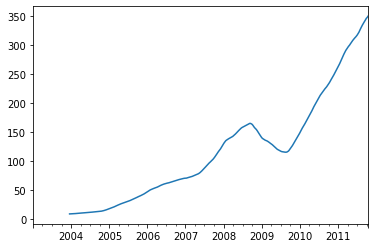

In [132]:
close_px.AAPL.rolling(250).mean().plot()

In [133]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

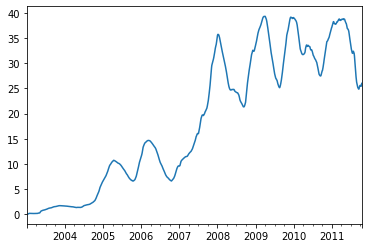

In [134]:
appl_std250.plot()

확장창 평균을 구하기 위해서 rolling 대신 expanding을 사용

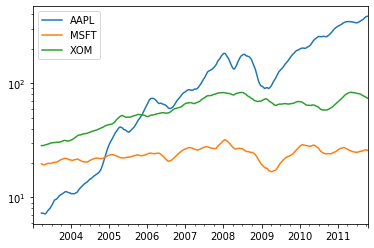

In [136]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [137]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 11.7.1 지수 가중 함수

NameError: name 'plt' is not defined

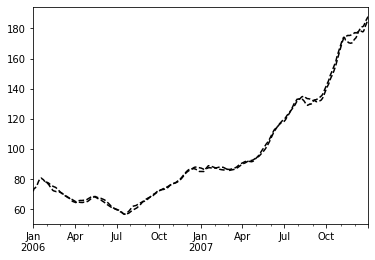

In [138]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30,min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--',label='Simple MA')
ewma60.plot(style='k--',label='EW MA')
plt.legend()

### 11.7.2 이진 이동창 함수

In [ ]:
spx_px = close_px_all['SPX']

### 11.7.3 사용자 정의 이동창 함수

구글링으로 채우기